In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)  
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [3]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [4]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


***using scatter plot***
**<ins>A SCATTER PLOT.</ins>**

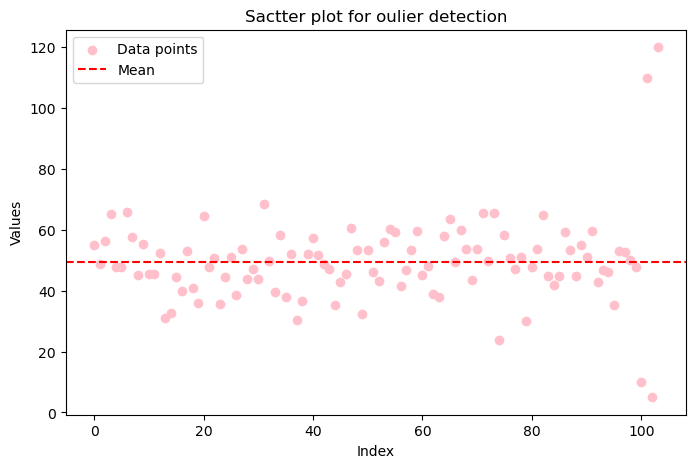

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='pink',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Sactter plot for oulier detection")
plt.legend()
plt.show()

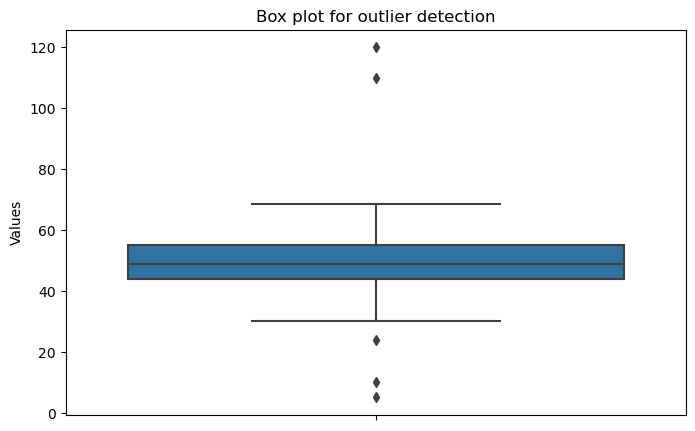

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box plot for outlier detection")
plt.show()

In [15]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


**Interquartile Range(IQR) Method The IQR Formula is**
IQR=Q3-Q1
STEPS:
1.calculate Q1(25TH PERCENTILE) and Q3(75th PERCENTILE)
2.compute IQR=Q3-Q1.
3.Define Lower and Upper bounds:
       **lower_bound=Q1-1.5*IQR**
       **Upper_bound=Q3+1.5*IQR**
4.Any value outside these bounds is an outlier.

In [23]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')
print(df[df['Outlier_IQR'] == 'Outlier'])


         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 

The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [33]:
import numpy as np
import pandas as pd
np.random.seed(42)
data = np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10, 110, 5, 120])
data=np.concatenate([data, outliers])
df=pd.DataFrame(data, columns=['Values'])
min_value = df['Values'].min()
Q1=df['Values'].quantile(0.25)
median=df['Values'].median()
Q3=df['Values'].quantile(0.75)
max_value=df['Values'].max()
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
outliers_df=df[(df['Values']<lower_bound)|(df['Values']>upper_bound)]
print(f"5 Number Summary:")
print(f"Minimum (Q0):{min_value}")
print(f"First Quartile (Q1):{Q1}")
print(f"Median (Q2):{median}")
print(f"Third Quartile (Q3):{Q3}")
print(f"Maximum (Q4):{max_value}")
print(f"IQR:{IQR}")
print(f"lower bound:{lower_bound},Upper bound:{upper_bound}")
print(f"Outliers:\n{outliers_df}")


5 Number Summary:
Minimum (Q0):5.0
First Quartile (Q1):43.874401021766715
Median (Q2):48.73043708220287
Third Quartile (Q3):55.00852473036764
Maximum (Q4):120.0
IQR:11.134123708600924
lower bound:27.17321545886533,Upper bound:71.70971029326903
Outliers:
         Values
74    23.802549
100   10.000000
101  110.000000
102    5.000000
103  120.000000
